# Lab 3 - Exploring and manipulating data. 
Here is what we will do:
1. Prepare the data
2. Train 3 models
 - Decision Tree
 - SVM using rgb
 - Neural Net
3. Get model performance on train and test sets
4. Create appropriate graphs

### Prepare the data 

In [56]:
# third cell 
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")
# Compute bmi based on height and weight metric units
def bmi(height, weight):
 return 10000*weight/(height**2)

new_feature = bmi(howell_full['height'], howell_full['weight'])

howell_full['bmi'] = new_feature
howell_full.head(n=10)
import numpy as np
def bmi_category(bmi):
 # bmi can only be a single value
 if bmi < 18.5: return 'Underweight'
 if bmi < 25.0: return 'Normal'
 if bmi < 30.0: return 'Overweight'
 return 'Obese'
vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

howell_full['bmi class'].value_counts()




bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

In [57]:
print(howell_full.head(n=10))
print(howell_full.describe())
howell_full.corr()

    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal
           height      weight         age        male         bmi
count  544.000000  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426   17.396489
std     27.602448   14.719178   20.746888    0.499699    2.530607
min     53.975000    4.252425    0.000000    0.000000    9.815018
25%    125.095000   22.007717   

ValueError: could not convert string to float: 'Normal'

### Quick look at distributions:

### Quick Visualization

### A Better Plot

In [20]:
import matplotlib.pyplot as plt
#height = howell_full['height']
weight = howell_full['weight']
#gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

NameError: name 'height' is not defined

### Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

### Adding a New Feature

### Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

# Create a graph on the full data set plotting age vs bmi

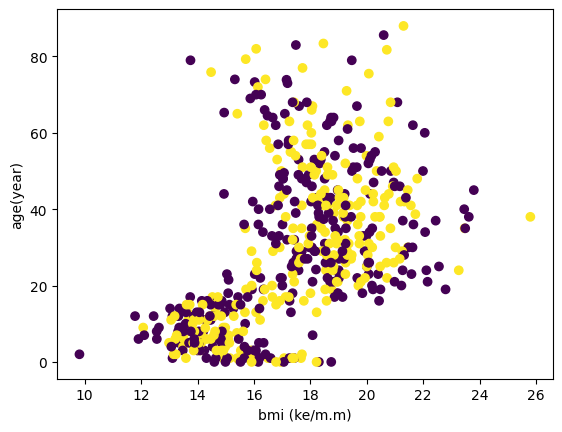

In [80]:
import matplotlib.pyplot as plt
bmi = howell_full['bmi']
age = howell_full['age']
gender = howell_full['male']
plt.scatter(bmi,age, c=gender)
plt.xlabel('bmi (ke/m.m)')
plt.ylabel('age(year)')
plt.show()

### Splitting the Data by Age

In [81]:
over18 = howell_full["age"] > 18
print(over18)
# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18] # ~ is not in numpy
#print("There are ", len(howell_adults), " adult instances")
#print(howell_adults)
#print("There are ", len(howell_children), " child instances")
#print(howell_children)

0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool


### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

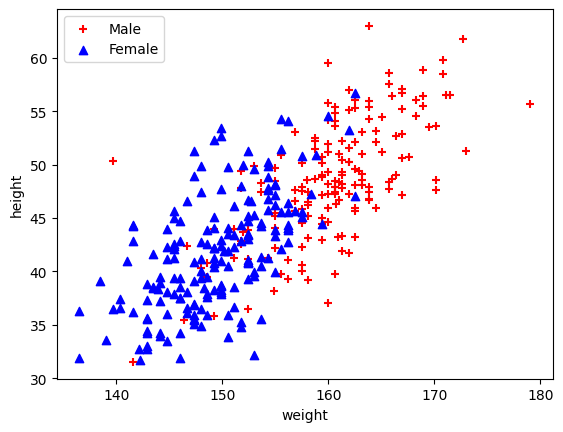

In [82]:
import matplotlib.pyplot as plt
male_height = np.ma.masked_where(howell_adults['male']==0, 
 howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1, 
 howell_adults['height'])
weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

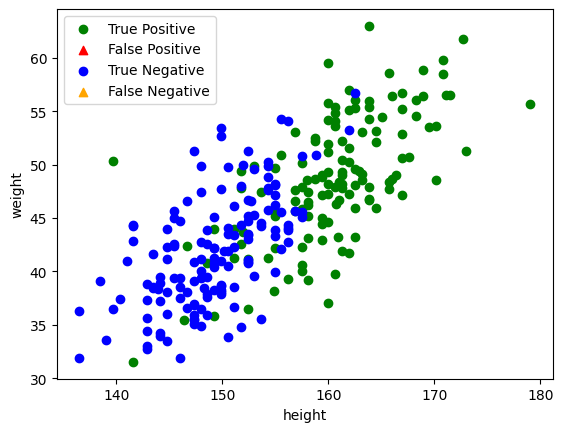

In [84]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')



    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()
plot2FeatureBinaryConfusion(train_set, 'height', 'weight', 'male', y_pred)

### Train/Test Data Split

### Stratified Test/Train Data Split

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
 random_state=123)
for train_indices, test_indices in splitter.split(howell_adults, 
howell_adults['male']):
 train_set = howell_adults.iloc[train_indices]
 test_set = howell_adults.iloc[test_indices]
 
print('Train size: ', len(train_set), 'Test size: ', len(test_set))


Train size:  276 Test size:  70


### Train and evaluate a Linear Regression Model

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
X = train_set[['height']]
y = train_set['male']
X_test = test_set[['height']]
y_test = test_set['male']
tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)
y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is ', recall_score(y,y_pred))
print('F1 is ', f1_score(y, y_pred))
y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred))
print('Recall is ', recall_score(y_test,y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))


Results for decision tree on training data
 Default settings
Confusion Matrix
[[139   6]
 [ 22 109]]
Accuracy is  0.8985507246376812
Precision is  0.9478260869565217
Recall is  0.8320610687022901
F1 is  0.8861788617886179
Results for decision tree on test data
 Default settings
Confusion Matrix
[[33  4]
 [ 9 24]]
Accuracy is  0.8142857142857143
Precision is  0.8571428571428571
Recall is  0.7272727272727273
F1 is  0.7868852459016393


# Results
Basic results for our classification model to predict gender 
on the Howell data.
| Model | Training Features | Set | Accuracy | F1 |
|:---|:---|:---|:---|:---|
|Decision Tree|Height|Training|89.85|88.62|
Decision Tree|Height|Test|81.43|78.69|

## Train on different feature

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
#X = train_set[['height']]
X = train_set[['weight']]
y = train_set['male']
#X_test = test_set[['height']]
X_test = test_set[['weight']]
y_test = test_set['male']
tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)
y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is ', recall_score(y,y_pred))
print('F1 is ', f1_score(y, y_pred))
y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred))
print('Recall is ', recall_score(y_test,y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))


Results for decision tree on training data
 Default settings
Confusion Matrix
[[145   0]
 [ 11 120]]
Accuracy is  0.9601449275362319
Precision is  1.0
Recall is  0.916030534351145
F1 is  0.9561752988047809
Results for decision tree on test data
 Default settings
Confusion Matrix
[[25 12]
 [14 19]]
Accuracy is  0.6285714285714286
Precision is  0.6129032258064516
Recall is  0.5757575757575758
F1 is  0.59375


## Train on multiple features.

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
#X = train_set[['height']]
#X = train_set[['weight']]
#y = train_set['male']
X = train_set[['height', 'weight']]
y = train_set['male']
#X_test = test_set[['height']]
#X_test = test_set[['weight']]
X_test = test_set[['height', 'weight']]
y_test = test_set['male']
tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)
y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is ', recall_score(y,y_pred))
print('F1 is ', f1_score(y, y_pred))
y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred))
print('Recall is ', recall_score(y_test,y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

Results for decision tree on training data
 Default settings
Confusion Matrix
[[145   0]
 [  0 131]]
Accuracy is  1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Results for decision tree on test data
 Default settings
Confusion Matrix
[[28  9]
 [11 22]]
Accuracy is  0.7142857142857143
Precision is  0.7096774193548387
Recall is  0.6666666666666666
F1 is  0.6875


## Decision Tree Specific Visualization.

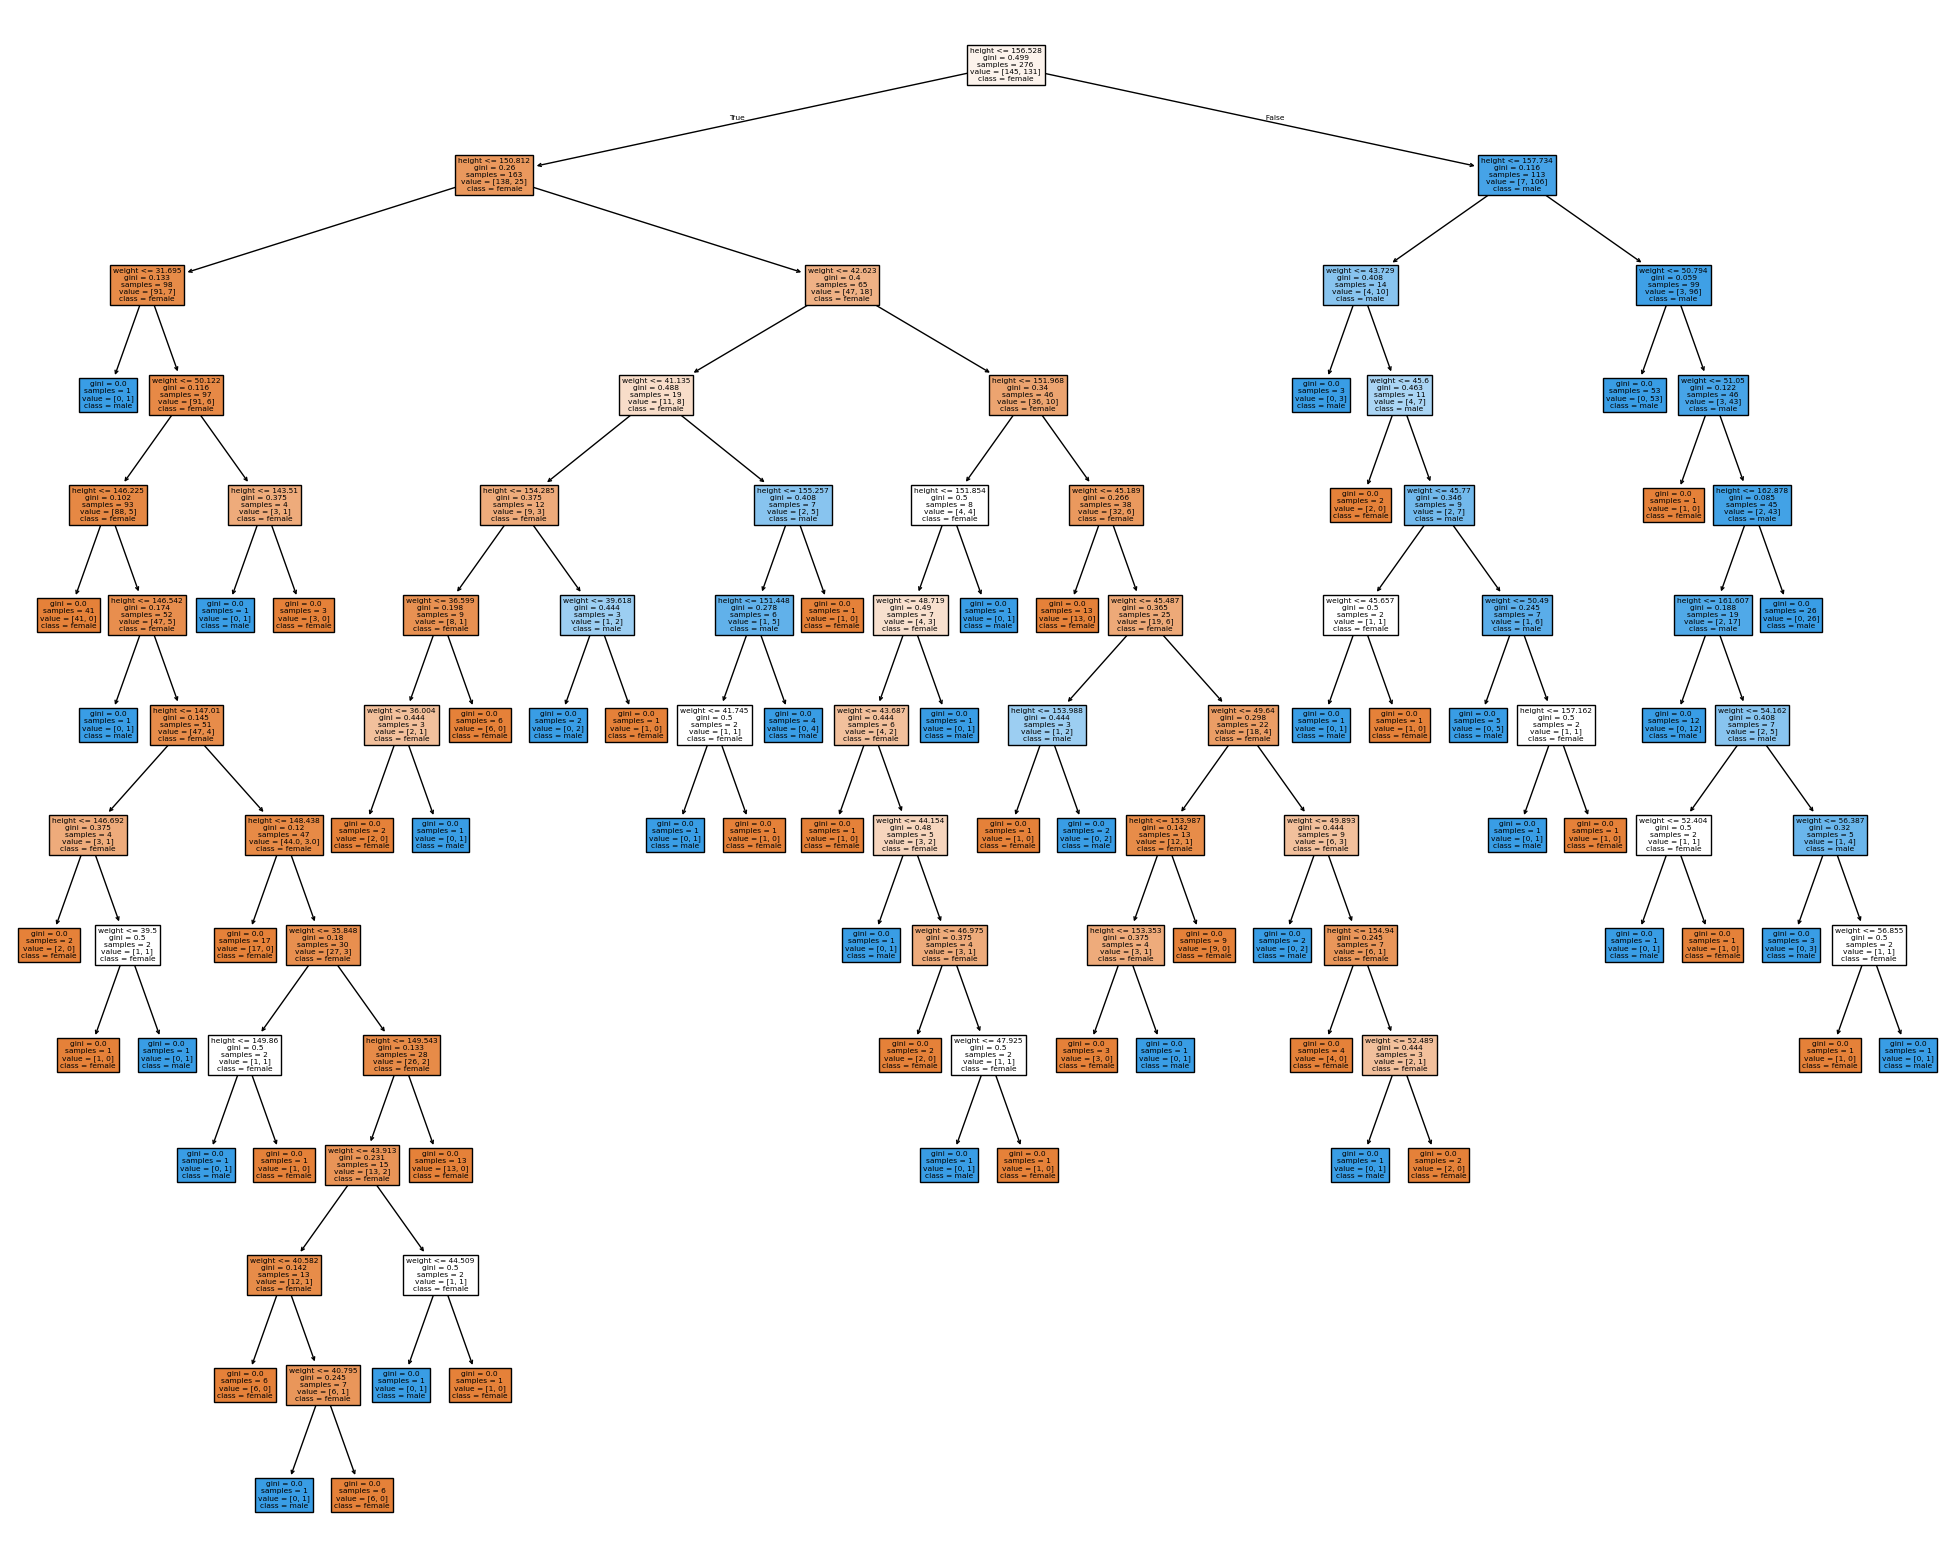

In [85]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
plot_tree(tree_model, 
 feature_names=['height', 'weight'], 
class_names=['female', 'male'],
filled=True)
fig.savefig("decision_tree_howell.png")

## Train an SVC model.

## Train and evaluate SVC model 

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
#X = train_set[['height']]
#X = train_set[['weight']]
#y = train_set['male']
X = train_set[['height', 'weight']]
y = train_set['male']
#X_test = test_set[['height']]
#X_test = test_set[['weight']]
X_test = test_set[['height', 'weight']]
y_test = test_set['male']
svc_model = SVC()
svc_model.fit(X,y)
y_pred = svc_model.predict(X)
print('Results for svc on training data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is ', recall_score(y,y_pred))
print('F1 is ', f1_score(y, y_pred))
y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred))
print('Recall is ', recall_score(y_test,y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

Results for svc on training data
 Default settings
Confusion Matrix
[[126  19]
 [ 23 108]]
Accuracy is  0.8478260869565217
Precision is  0.8503937007874016
Recall is  0.8244274809160306
F1 is  0.8372093023255814
Results for svc on test data
 Default settings
Confusion Matrix
[[29  8]
 [ 8 25]]
Accuracy is  0.7714285714285715
Precision is  0.7575757575757576
Recall is  0.7575757575757576
F1 is  0.7575757575757576


## Graph the support vectors

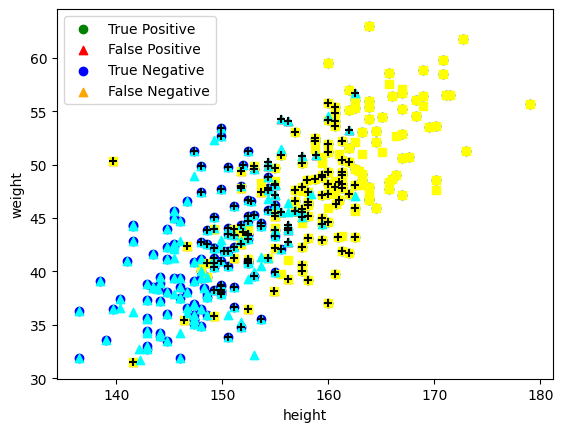

In [93]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)
# get the values for the support vectors (the special instances)
    support_x = [x for (x,y) in svc_model.support_vectors_]
    support_y = [y for (x,y) in svc_model.support_vectors_]
   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')
    plt.scatter(male_height, weight, c='yellow', marker='s')
    plt.scatter(female_height, weight, c='cyan', marker='^')
    plt.scatter(support_x, support_y, c='black', marker='+')

    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()
plot2FeatureBinaryConfusion(train_set, 'height', 'weight', 'male', y_pred)

## Train a NN model.

### Train and evaluate Decision Tree model

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming train_set and test_set are already defined

X = train_set[['height', 'weight']]
y = train_set['male']
X_test = test_set[['height', 'weight']]
y_test = test_set['male']

# Initialize models
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs', max_iter=600)
tree_model = DecisionTreeClassifier()

# Fit models
nn_model.fit(X, y)
tree_model.fit(X, y)

# Predictions on training data
y_pred = nn_model.predict(X)
print('Results for neural network on training data')
print('Default settings')
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print('Accuracy:', accuracy_score(y, y_pred))
print('Precision:', precision_score(y, y_pred))
print('Recall:', recall_score(y, y_pred))
print('F1:', f1_score(y, y_pred))

# Predictions on test data
y_test_pred = nn_model.predict(X_test)
print('\nResults for neural network on test data')
print('Default settings')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1:', f1_score(y_test, y_test_pred))


Results for neural network on training data
Default settings
Confusion Matrix:
[[123  22]
 [ 25 106]]
Accuracy: 0.8297101449275363
Precision: 0.828125
Recall: 0.8091603053435115
F1: 0.8185328185328186

Results for neural network on test data
Default settings
Confusion Matrix:
[[28  9]
 [ 8 25]]
Accuracy: 0.7571428571428571
Precision: 0.7352941176470589
Recall: 0.7575757575757576
F1: 0.746268656716418


In [ ]:
|MLP|Height, Weight, (50,25,10) lbfgs|Training|84.78|83.72|
|MLP|Height, Weight, (50,25,10) lbfgs|Test|78.57|77.62